<a href="https://colab.research.google.com/github/Eyabennessib/Machine-Learning/blob/main/TP7_autoencodeurs_EBN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD-TP 7 -- Autoencodeurs 


> Ce TD-TP a pour objectif de construire un autoencodeur pour trois types d'applications : reconstruction, débruitage et détection d'anomaies sur différents jeux de données.



---


### Eya BEN NESSIB

# **Partie I - Introducution : reconstruction**

## 1) Téléchargez les librairies utiles :

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import sys

## 2) Expliquez les lignes de code ci-dessous :

In [ ]:
SIZE=256
img_data=[]

img = cv2.imread("C:/Users/Eyq/OneDrive/Desktop/monalisa.jpg", 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors

## 3) Donnez la dimesion de l'image.

In [ ]:
print(img.shape) # Complétez (256, 256, 3)
# 256 X 256 pixels et 3 pour RGB

(256, 256, 3)


In [ ]:
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))

## 4) Donnez le type et la dimension de de img_array.

In [ ]:
print("le type est ", type(img_array))
print("la dimension est ", img_array.shape)

le type est  <class 'numpy.ndarray'>
la dimension est  (1, 256, 256, 3)


## 5) Normalisez les données disponibles dans img_array.

In [ ]:
X_train = img_array/255.

## 6) Expliquez l'architecture du réseau de neurones sur lequel vous serez amené à travailler (type de réseau, nombre de couches ...)

In [ ]:
model = Sequential() #type de réseau séquentiel

#couche Conv2D : Cette couche crée un noyau de convolution qui est convolué avec l'entrée de la couche pour produire un tenseur de sorties
# fonction d'activation :  Rectified Linear Unit ( pour toutes les couches Conv2D) ==> Regression linéaire
#Encodeur
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3))) #couche d'entrée convolutionelle de taille 2D avec avec 32 input et une fonction d'activation relu 
model.add(MaxPooling2D((2, 2), padding='same')) # 1ère sous couche MaxPooling2D de taille (2,2) pour un sous-échantillonnage
model.add(Conv2D(8, (3, 3), activation='relu', padding='same')) # 2ème sous couche conv2D du réseau avec 8 noyaux et chaque noyaux de taille (3,3)
model.add(MaxPooling2D((2, 2), padding='same')) # 3ème sous couche MaxPooling2D de taille (2,2) pour un sous-échantillonnage
model.add(Conv2D(8, (3, 3), activation='relu', padding='same')) # 4ème couche conv2D du réseau avec 8 noyaux et chaque noyaux de taille (3,3)
model.add(MaxPooling2D((2, 2), padding='same')) # 5ème sous couche de taille (2,2) pour un sous-échantillonnage
model.add(Conv2D(8, (3, 3), activation='relu', padding='same')) # 6ème sous couche convolutionelle de taille 2D avec 8 noyaux de taille (3,3)
#Décodeur
model.add(UpSampling2D((2, 2)))
# 7ème sous couche de sur échantillonnage de facteurs(2,2)
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# 8ème sous couche convolutionelle de taille 2D avec 8 noyaux de taille (3,3)
model.add(UpSampling2D((2, 2)))
# 9ème sous couche de sur échantillonnage de facteurs(2,2)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# 10ème sous couche convolutionelle de taille 2D avec 32 noyaux de taille (3,3)
model.add(UpSampling2D((2, 2)))
# 11ème sous couche de sur échantillonnage de facteurs(2,2)
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
# couche de sortie convolutionelle de taille 2D avec 3 noyaux de taille (3,3)

## 7) Configurez l'architecture avant la phase d'entraiement en choisissant : 
- la fonction de côut 'mean_squared_error', 
- l'optimization :  'adam'
- la métrique de mesure de la performance : 'accuracy'

In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

## 8) Donnez un aperçu du modèle et analysez le réseau.

In [ ]:
print(model.summary()) 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 8)       

## 9) Entrainez le modèle en prenant par exemple 20 épisodes. 

In [ ]:
model.fit(X_train, X_train, batch_size=64, verbose = 1 ,epochs =20)

Epoch 1/20
1/1 [==============================] - 1s 801ms/step - loss: 0.1324 - accuracy: 0.2430
Epoch 2/20
1/1 [==============================] - 0s 96ms/step - loss: 0.1175 - accuracy: 0.1231
Epoch 3/20
1/1 [==============================] - 0s 120ms/step - loss: 0.1003 - accuracy: 0.1292
Epoch 4/20
1/1 [==============================] - 0s 127ms/step - loss: 0.0868 - accuracy: 0.1293
Epoch 5/20
1/1 [==============================] - 0s 119ms/step - loss: 0.0855 - accuracy: 0.1290
Epoch 6/20
1/1 [==============================] - 0s 118ms/step - loss: 0.0846 - accuracy: 0.1228
Epoch 7/20
1/1 [==============================] - 0s 136ms/step - loss: 0.0783 - accuracy: 0.2582
Epoch 8/20
1/1 [==============================] - 0s 165ms/step - loss: 0.0733 - accuracy: 0.2729
Epoch 9/20
1/1 [==============================] - 0s 151ms/step - loss: 0.0722 - accuracy: 0.2727
Epoch 10/20
1/1 [==============================] - 0s 145ms/step - loss: 0.0737 - accuracy: 0.2712
Epoch 11/20
1/1 [===

## 10) Prédisez le modèle.

In [ ]:
print("Neural network output")
pred = model.predict(X_train)

Neural network output


## 11) Affichez l'image prédite puis commentez le résultat.

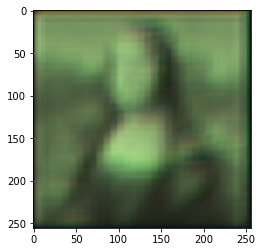

In [ ]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

On retrouve l'image mais elle est masquée et floue.
20 epochs ne suffit pas pour reconstruire l'image.

## 12) Augmentez le nombre d'épisode et analysez les images prédites obtenues.

# **Partie II - Débruitage d'images**

L'objectif de cette partie est de débruiter des images en utilisant un autoencodeur. Vous travaillerez avec le jeu de données MNIST.

---

## 1) Téléchargez le jeu de données MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

## 2) Donnez les dimensions du jeu de données ainsi que la taille des images. Normalisez ensuite les images.

In [ ]:
print(x_train.shape)
print(x_test.shape)

x_train = x_train/255.
x_test = x_test/255.

(60000, 28, 28)
(10000, 28, 28)


## 3) Expliquez les lignes ci-dessous :

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) #l'ajout d'une dimension vide au jeu de données 
#pour indiquer le plan à numpy
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 4) On souhaite construire à partir des images MNIST non-bruités des imges bruitées (bruit Gaussien) comme suit : 

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

## 5) Affichez une dizaine d'images bruitées :

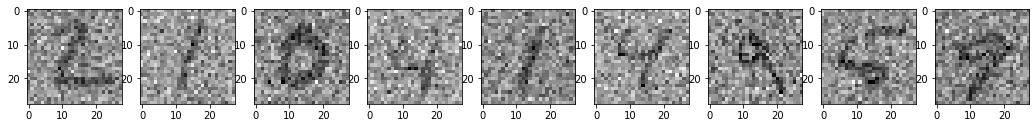

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

## 6) Expliquez l'intérêt des lignes de code ci-dessous :

In [ ]:
# un type d'égalisation
x_train_noisy = np.clip(x_train_noisy, 0., 1.) #minimiser les valeurs de x train entre 0 et 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)  #minimiser les valeurs de x test entre 0 et 1

## 7) Affichez une dizaine d'images bruitées puis commentez.

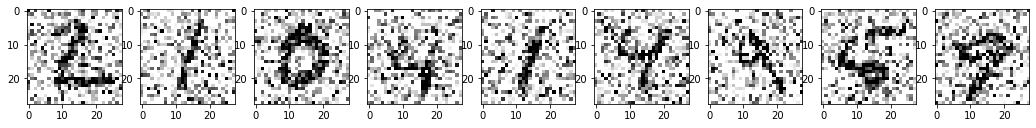

In [ ]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

Après l'égalisation des valeurs entre 0 et 1, on peut distinguer les chiffres.

## 8) Expliquez l'architecture du réseau de neuronnes sur lequel vous serez amené à travailler (type de réseau, nombre de couches ...)

In [ ]:
# choisir le modèle séquentiel
model = Sequential() 
#Encodeur
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# couche d'entrée : couche de convolutionn 2D avec 32 neurones de taille (3,3) 
# avec fonction d'activation relu pour la couche d'entrée
model.add(MaxPooling2D((2, 2), padding='same'))
# sous couche Maxpooling est pour réduire les dimensions spatiales du volume de sortie
# sous_échantillonnage de facteur 2
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# sous couche de convolutionn 2D avec 8 neurones de taille (3,3) 
model.add(MaxPooling2D((2, 2), padding='same'))
# sous_échantillonnage de facteur 2
# sous couche Maxpooling est pour réduire les dimensions spatiales du volume de sortie
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# sous couche de convolutionn 2D avec 8 neurones de taille (3,3) 
model.add(MaxPooling2D((2, 2), padding='same'))
# sous_échantillonnage de facteur 2
# sous couche Maxpooling est pour réduire les dimensions spatiales du volume de sortie

#Décodeur
# sous couche de convolutionn 2D avec 8 neurones de taille (3,3)
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2))) # sous couche de sur-échantillonnage de facteur 2,2
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# sous couche de convolutionn 2D avec 8 neurones de taille (3,3)
model.add(UpSampling2D((2, 2)))
# sous couche de sur-échantillonnage de facteur 2,2
model.add(Conv2D(32, (3, 3), activation='relu'))
# sous couche de convolutionn 2D avec 8 neurones de taille (3,3)
model.add(UpSampling2D((2, 2)))
# sous couche de sur-échantillonnage de facteur 2,2
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))
# couche de sortie convolutionn 2D avec 8 neurones de taille (3,3)

# 13 couches en total
# l'entrée est une image de 28 pixel par 28 et pour chaque pixel un vecteur de une seule composante (28, 28, 1)


## 9) Configurez l'architecture avant la phase d'entraiement en choisissant : 
- la fonction de côut 'mean_squared_error', 
- l'optimization :  'adam'
- la métrique de mesure de la performance : 'accuracy'Nouvelle section

In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

## 10) Donnez un aperçu du modèle et analysez le réseau.

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 8)         

## 11) Entrainez le modèle en utilisant par exemple 10 episodes et un batch_size de 256.

In [ ]:
model.fit(x_train_noisy, x_train, batch_size=256, epochs =10, shuffle = False)

Epoch 1/10
235/235 [==============================] - 40s 167ms/step - loss: 0.0566 - accuracy: 0.7979
Epoch 2/10
235/235 [==============================] - 45s 191ms/step - loss: 0.0401 - accuracy: 0.7993
Epoch 3/10
235/235 [==============================] - 45s 190ms/step - loss: 0.0351 - accuracy: 0.8016
Epoch 4/10
235/235 [==============================] - 55s 236ms/step - loss: 0.0321 - accuracy: 0.8031
Epoch 5/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0300 - accuracy: 0.8043
Epoch 6/10
235/235 [==============================] - 54s 232ms/step - loss: 0.0286 - accuracy: 0.8052
Epoch 7/10
235/235 [==============================] - 55s 233ms/step - loss: 0.0275 - accuracy: 0.8058
Epoch 8/10
235/235 [==============================] - 53s 226ms/step - loss: 0.0266 - accuracy: 0.8062
Epoch 9/10
235/235 [==============================] - 49s 208ms/step - loss: 0.0259 - accuracy: 0.8066
Epoch 10/10
235/235 [==============================] - 74s 317ms/step - l

## 12) Evaluez, sauvegardez (denoising_autoencoder.model) le modèle.

In [ ]:
print(model.evaluate(x_test_noisy, x_test))

model.save('denoising_autoencoder.model')

313/313 [==============================] - 3s 10ms/step - loss: 0.0250 - accuracy: 0.8073
[0.025041956454515457, 0.8073357343673706]
INFO:tensorflow:Assets written to: denoising_autoencoder.model\assets


## 13) Prédisez puis affichez une dizaine d'images bruitées que vous comparerez à leurs  versions débruitées par l'autoencodeur.

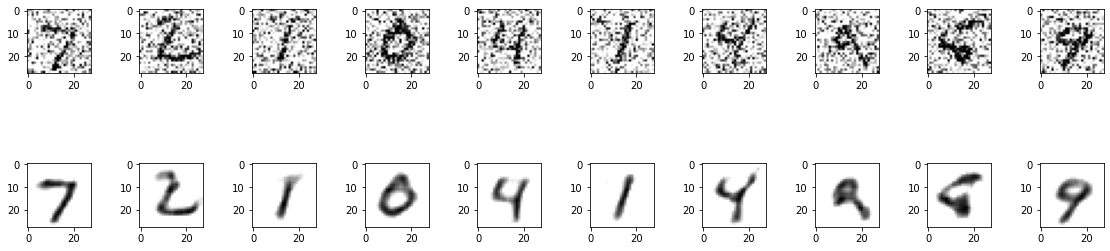

In [ ]:
no_noise_img =model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

On peut voir les chiffres clairement avec l'autoencodeur 

# **Partie III -- Détection d'anomalies**
L'objectif de cette partie est déceler une anomalie dans les données en utilsant un autoencodeur. 

## 1) Lisez et analysez le fichier csv. Que contient df ?

In [ ]:
cd "C:\Users\Eyq\OneDrive\Desktop"

C:\Users\Eyq\OneDrive\Desktop


In [ ]:
import pandas as pd
df = pd.read_csv("anomaly.csv")

print(df.head())
print(df.groupby('Quality')['Quality'].count())

       Date  Power  Detector Quality
0  1-Jan-16     96         8    Good
1  2-Jan-16     96        10    Good
2  3-Jan-16     91         8    Good
3  4-Jan-16     97         9    Good
4  5-Jan-16     91        11    Good
Quality
Bad      407
Good    1054
Name: Quality, dtype: int64


## 2) Nettoyez le fichier anomaly.csv (supprimer 'Date')

In [ ]:
df=df.drop(['Date'],axis=1)

In [ ]:
df.head()

,Power,Detector,Quality
0,96,8,Good
1,96,10,Good
2,91,8,Good
3,97,9,Good
4,91,11,Good


## 3) Préparez le jeu de données en expliquant les différentes lignes de code ci-dessous : 

In [ ]:
#COnvert non-numeric to numeric
df.Quality[df.Quality == 'Good'] = 1 # affecter 1 à good
df.Quality[df.Quality == 'Bad'] = 2 #ffecter 2 à bad

C:\Users\Eyq\AppData\Local\Temp/ipykernel_12516/808736868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality == 'Good'] = 1 # affecter 1 à good
C:\Users\Eyq\AppData\Local\Temp/ipykernel_12516/808736868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality == 'Bad'] = 2 #ffecter 2 à bad


In [ ]:
# Séparation des données "good" des données "bad"
good_mask = df['Quality']== 1 
bad_mask = df['Quality']== 2 

df.drop('Quality',axis=1,inplace=True)
df_good = df[good_mask]
df_bad = df[bad_mask]

print(f"Good count: {len(df_good)}")
print(f"Bad count: {len(df_bad)}")

# Jeu de données
x_good = df_good.values
x_bad = df_bad.values

Good count: 1054
Bad count: 407


## 4) Préparez le jeu de données d'entrainement et de test.

In [ ]:
from sklearn.model_selection import train_test_split

x_good_train, x_good_test = train_test_split(
        x_good, test_size=0.25, random_state=42)

print(f"Good train count: {len(x_good_train)}")
print(f"Good test count: {len(x_good_test)}")

Good train count: 790
Good test count: 264


## 5) Expliquez l'architecture du réseau décrite ci-dessous. Identifiez le type de réseau de neurones.

In [ ]:
model = Sequential() #type séquentiel
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu'))
#couche d'entrée avec 10 neurones et une fonction d'activation relu 
# dimension d'entrée égale à 2
model.add(Dense(3, activation='relu'))
#sous couche avec 3 poids ou 3 neurones et une fonction d'activation relu(regression)
model.add(Dense(10, activation='relu'))
#sous couche avec 10 poids ou 10 neurones et une fonction d'activation relu(regression)
model.add(Dense(x_good.shape[1])) 
#couche de sortie avec 2 poids

## 6) Configurez l'architecture avant la phase d'entraiement en choisissant :
- la fonction de côut 'mean_squared_error',
- l'optimization : 'adam'
- la métrique de mesure de la performance : 'accuracy'

In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

## 7) Donnez un aperçu du modèle et analysez le réseau.

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
 dense_6 (Dense)             (None, 10)                40        
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________
None


## 8) Entrainez le modèle en utilisant par exemple 100 episodes et un batch_size de XXX. 

In [ ]:
print(df_good)

      Power  Detector
0        96         8
1        96        10
2        91         8
3        97         9
4        91        11
...     ...       ...
1456     93         8
1457     91        10
1458     95         8
1459     91        10
1460    100        12

[1054 rows x 2 columns]


In [ ]:
model.fit(x_good_train, x_good_train, batch_size=32 ,epochs =100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4555.7847 - accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 818us/step - loss: 4454.3706 - accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 879us/step - loss: 4250.8198 - accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 935us/step - loss: 3850.8782 - accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 888us/step - loss: 3291.7896 - accuracy: 0.6987
Epoch 6/100
25/25 [==============================] - 0s 815us/step - loss: 2567.6914 - accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 882us/step - loss: 1709.2350 - accuracy: 1.0000
Epoch 8/100
25/25 [==============================] - 0s 747us/step - loss: 867.2518 - accuracy: 1.0000
Epoch 9/100
25/25 [==============================] - 0s 955us/step - loss: 277.6393 - accuracy: 1.0000
Epoch 10/100
25/25 [==============================] 

## 9) Evaluez le modèle entrainé. Affichez et interprétez les scores obtenus.

In [ ]:
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))
print (score1)
pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))
print (score2)
pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))
print (score3)


1.2298374295287577
1.2283729946648247
3.082762722490509


On obtient presque la même erreur avec les jeux de données x_good et x_good_test.
Cependant, on obtient une valeur plus elevée avec le jeu de donnée x_bad.
On peut conclure que le modèle prédit mieux les valeurs de X_good par rapport à X_bad.
On peut expliquer ce phénomène par le fait d'entraîner le modèle sur le jeu de donnée x_good uniquement.